**House Price Prediction**

**First we will install the required packages**

In [ ]:
!pip install scikit-learn tensorflow pandas


In [ ]:
import pandas as pd

**Uploading the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
# Display the first few rows of the dataset
print(data.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

**Getting a Summary of the Data**

In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**Preprocess the Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = data.drop(columns=['date'])
y = data['date']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Creating preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


**Building and Training the Model using scikit-learn**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# We are Initializeing the model
model = LinearRegression()

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = data.drop(columns=['price'])
y = data['price']

X['date'] = pd.to_datetime(X['date']).map(pd.Timestamp.toordinal)

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

model.fit(X_train,y_train)

# Now we make predictions on the test set
y_pred = model.predict(X_test)

# Finally we will Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4610339288548.644
Mean Squared Error: 4610339288548.644


**Build and Train the Model using TensorFlow**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
tf_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

Epoch 1/100
92/92 [==============================] - 2s 11ms/step - loss: 448284196864.0000 - val_loss: 401441947648.0000
Epoch 2/100
92/92 [==============================] - 1s 10ms/step - loss: 447954780160.0000 - val_loss: 400801398784.0000
Epoch 3/100
92/92 [==============================] - 1s 10ms/step - loss: 446483857408.0000 - val_loss: 398712078336.0000
Epoch 4/100
92/92 [==============================] - 1s 11ms/step - loss: 442975223808.0000 - val_loss: 394472194048.0000
Epoch 5/100
92/92 [==============================] - 1s 11ms/step - loss: 436593524736.0000 - val_loss: 387363897344.0000
Epoch 6/100
92/92 [==============================] - 1s 10ms/step - loss: 426537320448.0000 - val_loss: 376787566592.0000
Epoch 7/100
92/92 [==============================] - 1s 11ms/step - loss: 412315385856.0000 - val_loss: 362693853184.0000
Epoch 8/100
92/92 [==============================] - 1s 15ms/step - loss: 394110205952.0000 - val_loss: 345118015488.0000
Epoch 9/100
92/92 [=====

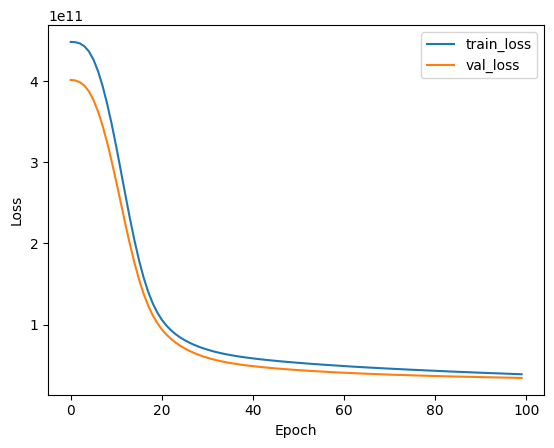

In [ ]:
import numpy as np

# Converting the preprocessed data to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining the neural network model
tf_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])


tf_model.compile(optimizer='adam', loss='mean_squared_error')

history = tf_model.fit(X_train_dense, y_train, epochs=100, validation_split=0.2, verbose=1)

y_pred_tf = tf_model.predict(X_test_dense)

from sklearn.metrics import mean_squared_error

mse_tf = mean_squared_error(y_test, y_pred_tf)
print(f'TensorFlow Model Mean Squared Error: {mse_tf}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




**Saving the Model**

In [ ]:
tf_model.save('house_price_model.h5')


loaded_model = tf.keras.models.load_model('house_price_model.h5')

# Making predictions with the loaded model
loaded_model_predictions = loaded_model.predict(X_test_dense)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 3ms/step
